In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,comment_text,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
data.shape

(223549, 7)

In [5]:
target = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']

**Target Class Distribution**

In [6]:
data['positive'] = data[target].progress_apply(lambda row: 1-row.max(), axis=1)

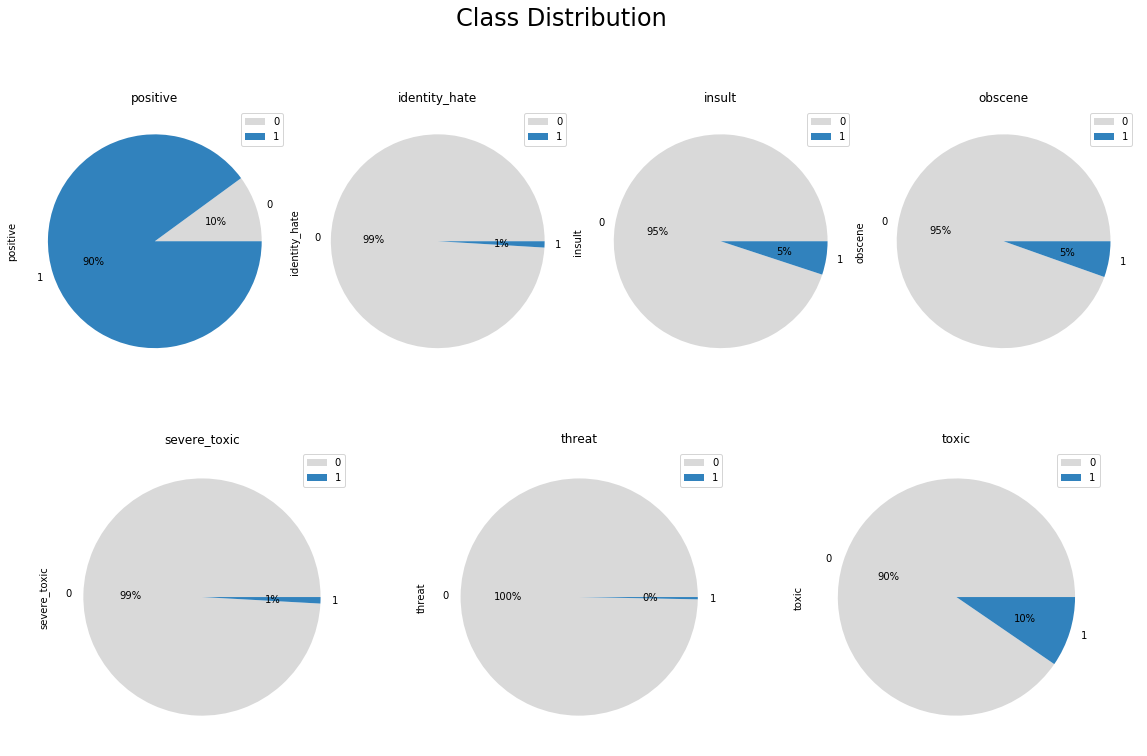

In [7]:
axes = []
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Class Distribution', fontsize=24)
for i in range(0, 12, 3):
    axes.append(plt.subplot2grid((2, 12), (0, i), colspan=3))
for i in range(0, 12, 4):
    axes.append(plt.subplot2grid((2, 12), (1, i), colspan=4))

for i, col in enumerate(['positive']+target):
    data[col].value_counts().sort_index().plot.pie(ax=axes[i], title=col, legend=True, autopct='%1.0f%%', colormap='tab20c_r')

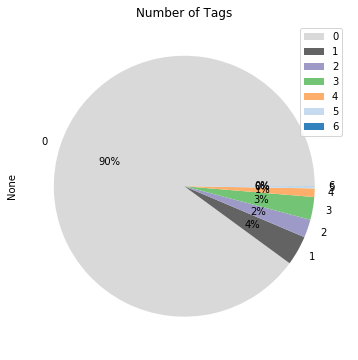

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
data[target].sum(1).value_counts(normalize=True, sort=False).plot.pie(ax=ax, 
                                                legend=True, title='Number of Tags', colormap='tab20c_r',  autopct='%1.0f%%')

In [9]:
data['len'] = data['comment_text'].progress_apply(lambda x: len(x.split()))

In [10]:
def describe(data):
    min_ = data.min()
    q1 = data.quantile(0.01)
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.50)
    q75 = data.quantile(0.75)
    q99 = data.quantile(0.99)
    max_ = data.max()
    return min_, q1, q25, q50, q75, q99, max_

In [11]:
distribution = pd.DataFrame({
    t : describe(data[data[t] == 1]['len']) for t in ['positive']+target
}, index=['min', '1st', '25th', '50th', '75th', '99th', 'max'])
distribution['all'] =  describe(data['len'])
distribution.transpose()

,min,1st,25th,50th,75th,99th,max
positive,1.0,4.0,17.0,37.0,77.0,565.00,1990.0
identity_hate,2.0,4.0,10.0,19.0,44.0,765.52,1247.0
insult,1.0,4.0,10.0,19.0,42.0,707.00,2321.0
obscene,1.0,4.0,9.0,19.0,42.0,708.83,2321.0
severe_toxic,2.0,4.0,9.0,18.0,45.0,972.85,1403.0
threat,2.0,4.0,12.0,22.0,43.0,905.40,1403.0
toxic,1.0,4.0,10.0,21.0,45.0,645.34,2321.0
all,1.0,4.0,16.0,35.0,74.0,569.00,2321.0
